# DRM Assignment 1 - Stock Analysis
## Stock: FORTIS Healthcare Limited (FORTIS.NS)
### Student: Amrit Lahari
### ID :2023A4PS0442P
### Date: November 7, 2025

## 1. Import Required Libraries

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Collection
Download historical stock data for FORTIS Healthcare from Yahoo Finance

In [12]:
# Define stock ticker for FORTIS Healthcare
# FORTIS.NS is actively traded - downloading real data

import time

# Define time period (last 2 years of data)
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

ticker = 'FORTIS.NS'
print("="*70)
print(f"DOWNLOADING REAL DATA FOR: {ticker}")
print("="*70)
print(f"Target Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print("\nFORTIS Healthcare Limited is actively traded on NSE")
print("Current Price: ~₹1,020 (as per Yahoo Finance)\n")

df = None
max_retries = 3

# Try multiple download strategies
for attempt in range(max_retries):
    print(f"Attempt {attempt + 1}/{max_retries}...")
    
    try:
        # Use simple yfinance download without custom session
        if attempt == 0:
            # First try: Direct download with date range
            df = yf.download(ticker, start=start_date, end=end_date, progress=False)
        elif attempt == 1:
            # Second try: Use period parameter
            df = yf.download(ticker, period='2y', progress=False)
        else:
            # Third try: Use Ticker object
            ticker_obj = yf.Ticker(ticker)
            df = ticker_obj.history(start=start_date, end=end_date)
        
        # Check if we got valid data
        if df is not None and not df.empty and len(df) > 50:
            print(f"✓ SUCCESS! Downloaded {len(df)} trading days of real data\n")
            break
        else:
            if df is not None and not df.empty:
                print(f"  Partial data received ({len(df)} days), retrying...\n")
            else:
                print(f"  No data received, retrying...\n")
            df = None
            
        # Wait before retry
        if attempt < max_retries - 1:
            print(f"  Waiting 3 seconds before next attempt...\n")
            time.sleep(3)
            
    except Exception as e:
        error_msg = str(e)
        print(f"  Error: {error_msg[:100]}")
        if attempt < max_retries - 1:
            print(f"  Waiting 3 seconds before retry...\n")
            time.sleep(3)
        df = None

# Final check
if df is None or df.empty:
    print("\n" + "="*70)
    print("⚠️  YAHOO FINANCE API ISSUE")
    print("="*70)
    print("\nThe Yahoo Finance API is currently unable to fetch FORTIS.NS data.")
    print("This could be due to:")
    print("• Temporary API restrictions or rate limiting")
    print("• Regional access limitations")
    print("• Recent changes in Yahoo Finance data access")
    print("\nFORTIS.NS is confirmed to be actively traded (₹1,020)")
    print("\nRECOMMENDED ACTIONS:")
    print("1. Try again in 10-15 minutes")
    print("2. Check if you can access https://finance.yahoo.com/quote/FORTIS.NS")
    print("3. Try using a VPN if regional restrictions apply")
    print("4. Contact your instructor about alternative data sources")
    print("="*70)
    raise Exception("Unable to download FORTIS.NS data. Please try the recommended actions above.")

# Clean and standardize the data
print("="*70)
print("DATA CLEANING AND STANDARDIZATION")
print("="*70)

# Flatten multi-level column headers if present
if isinstance(df.columns, pd.MultiIndex):
    print("• Flattening multi-level column headers")
    df.columns = df.columns.get_level_values(0)
    print(f"• New columns: {list(df.columns)}")

# Handle column names
if 'Adj Close' in df.columns:
    print("• Found 'Adj Close' column")
if 'Close' not in df.columns and 'Adj Close' in df.columns:
    df['Close'] = df['Adj Close']
    print("• Created 'Close' from 'Adj Close'")

# Remove any duplicate dates
if df.index.duplicated().any():
    original_len = len(df)
    df = df[~df.index.duplicated(keep='first')]
    print(f"• Removed {original_len - len(df)} duplicate entries")

# Sort by date
df = df.sort_index()
print("• Data sorted by date")

# Verify required columns
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
available_cols = [col for col in required_cols if col in df.columns]
print(f"• Available columns: {', '.join(available_cols)}")

# Display final results
print("\n" + "="*70)
print(f"{'✓ REAL DATA SUCCESSFULLY LOADED':^70}")
print("="*70)
print(f"Stock: FORTIS Healthcare Limited")
print(f"Ticker: {ticker}")
print(f"Exchange: NSE (National Stock Exchange of India)")
print(f"Start Date: {df.index[0].strftime('%Y-%m-%d')}")
print(f"End Date: {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(df)}")
print(f"Data Source: Yahoo Finance")
print(f"Latest Close Price: ₹{float(df['Close'].iloc[-1]):.2f}")
print(f"Period Covered: {((df.index[-1] - df.index[0]).days / 365.25):.1f} years")
print("="*70)

print("\n📊 First 5 Trading Days:")
display(df.head())

print("\n📊 Last 5 Trading Days:")
display(df.tail())

print("\n📈 Statistical Summary:")
display(df.describe())

print("\n" + "="*70)
print("✓ REAL FORTIS HEALTHCARE DATA IS READY FOR ANALYSIS!")
print("  All subsequent cells will use this authentic market data.")
print("="*70)

DOWNLOADING REAL DATA FOR: FORTIS.NS
Target Period: 2023-11-08 to 2025-11-07

FORTIS Healthcare Limited is actively traded on NSE
Current Price: ~₹1,020 (as per Yahoo Finance)

Attempt 1/3...
✓ SUCCESS! Downloaded 494 trading days of real data

DATA CLEANING AND STANDARDIZATION
• Flattening multi-level column headers
• New columns: ['Close', 'High', 'Low', 'Open', 'Volume']
• Data sorted by date
• Available columns: Open, High, Low, Close, Volume

                   ✓ REAL DATA SUCCESSFULLY LOADED                    
Stock: FORTIS Healthcare Limited
Ticker: FORTIS.NS
Exchange: NSE (National Stock Exchange of India)
Start Date: 2023-11-08
End Date: 2025-11-07
Total Trading Days: 494
Data Source: Yahoo Finance
Latest Close Price: ₹1020.00
Period Covered: 2.0 years

📊 First 5 Trading Days:


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-11-08,339.150543,340.346678,332.023653,337.804899,879120
2023-11-09,341.094238,345.380331,338.153759,339.848277,750240
2023-11-10,358.238647,364.817327,339.947937,342.390032,3712746
2023-11-13,367.508606,371.944208,350.862558,358.637341,3020750
2023-11-15,357.939606,371.695000,355.248318,371.595317,2621313



📊 Last 5 Trading Days:


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-11-03,1030.699951,1040.500000,1018.299988,1024.000000,1501905
2025-11-04,1019.099976,1034.500000,1016.000000,1031.000000,1773694
2025-11-05,1019.099976,1019.099976,1019.099976,1019.099976,0
2025-11-06,1009.900024,1029.900024,995.099976,1025.000000,2298960
2025-11-07,1020.000000,1022.500000,1000.799988,1007.000000,1719482



📈 Statistical Summary:


Price,Close,High,Low,Open,Volume
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02
mean,620.441368,630.022559,610.710682,620.402200,1.745214e+06
std,188.394400,189.813112,186.681184,188.346275,1.307122e+06
min,339.150543,340.346678,332.023653,337.804899,0.000000e+00
25%,450.526978,459.161478,443.923389,450.526950,1.012821e+06
50%,610.203339,620.091664,599.366157,609.778841,1.476047e+06
75%,713.293930,724.056187,702.069697,714.554921,2.064704e+06
max,1097.900024,1104.300049,1094.000000,1098.150024,1.178623e+07



✓ REAL FORTIS HEALTHCARE DATA IS READY FOR ANALYSIS!
  All subsequent cells will use this authentic market data.


In [10]:
# Display dataset information
print("Dataset Information:")
print("="*50)
df.info()
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2023-11-08 to 2025-11-07
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, FORTIS.NS)   494 non-null    float64
 1   (High, FORTIS.NS)    494 non-null    float64
 2   (Low, FORTIS.NS)     494 non-null    float64
 3   (Open, FORTIS.NS)    494 non-null    float64
 4   (Volume, FORTIS.NS)  494 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.2 KB


Basic Statistics:


Price,Close,High,Low,Open,Volume
Ticker,FORTIS.NS,FORTIS.NS,FORTIS.NS,FORTIS.NS,FORTIS.NS
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02
mean,620.441367,630.022559,610.710682,620.402200,1.745214e+06
std,188.394400,189.813113,186.681185,188.346276,1.307122e+06
min,339.150543,340.346678,332.023653,337.804899,0.000000e+00
25%,450.526970,459.161478,443.923381,450.526950,1.012821e+06
50%,610.203339,620.091664,599.366157,609.778841,1.476047e+06
75%,713.293930,724.056187,702.069697,714.554921,2.064704e+06
max,1097.900024,1104.300049,1094.000000,1098.150024,1.178623e+07


## 3. Data Preprocessing and Cleaning

In [13]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values if any (forward fill method)
if df.isnull().sum().sum() > 0:
    df = df.fillna(method='ffill')
    print("\nMissing values handled using forward fill method.")
else:
    print("\nNo missing values found!")

# Create a clean copy
stock_data = df.copy()

Missing Values:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

No missing values found!


## 4. Calculate Daily Returns

In [14]:
# Calculate daily returns using Close price
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate log returns
stock_data['Log_Return'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

# Display returns
print("Daily Returns Calculation:")
print("="*50)
print(stock_data[['Close', 'Daily_Return', 'Log_Return']].tail(10))

# Drop NaN values from returns
returns = stock_data['Daily_Return'].dropna()
log_returns = stock_data['Log_Return'].dropna()

Daily Returns Calculation:
Price             Close  Daily_Return  Log_Return
Date                                             
2025-10-27  1052.550049      0.014702    0.014595
2025-10-28  1057.000000      0.004228    0.004219
2025-10-29  1055.449951     -0.001466   -0.001468
2025-10-30  1044.599976     -0.010280   -0.010333
2025-10-31  1023.049988     -0.020630   -0.020846
2025-11-03  1030.699951      0.007478    0.007450
2025-11-04  1019.099976     -0.011254   -0.011318
2025-11-05  1019.099976      0.000000    0.000000
2025-11-06  1009.900024     -0.009028   -0.009069
2025-11-07  1020.000000      0.010001    0.009951


## 5. Exploratory Data Analysis (EDA)

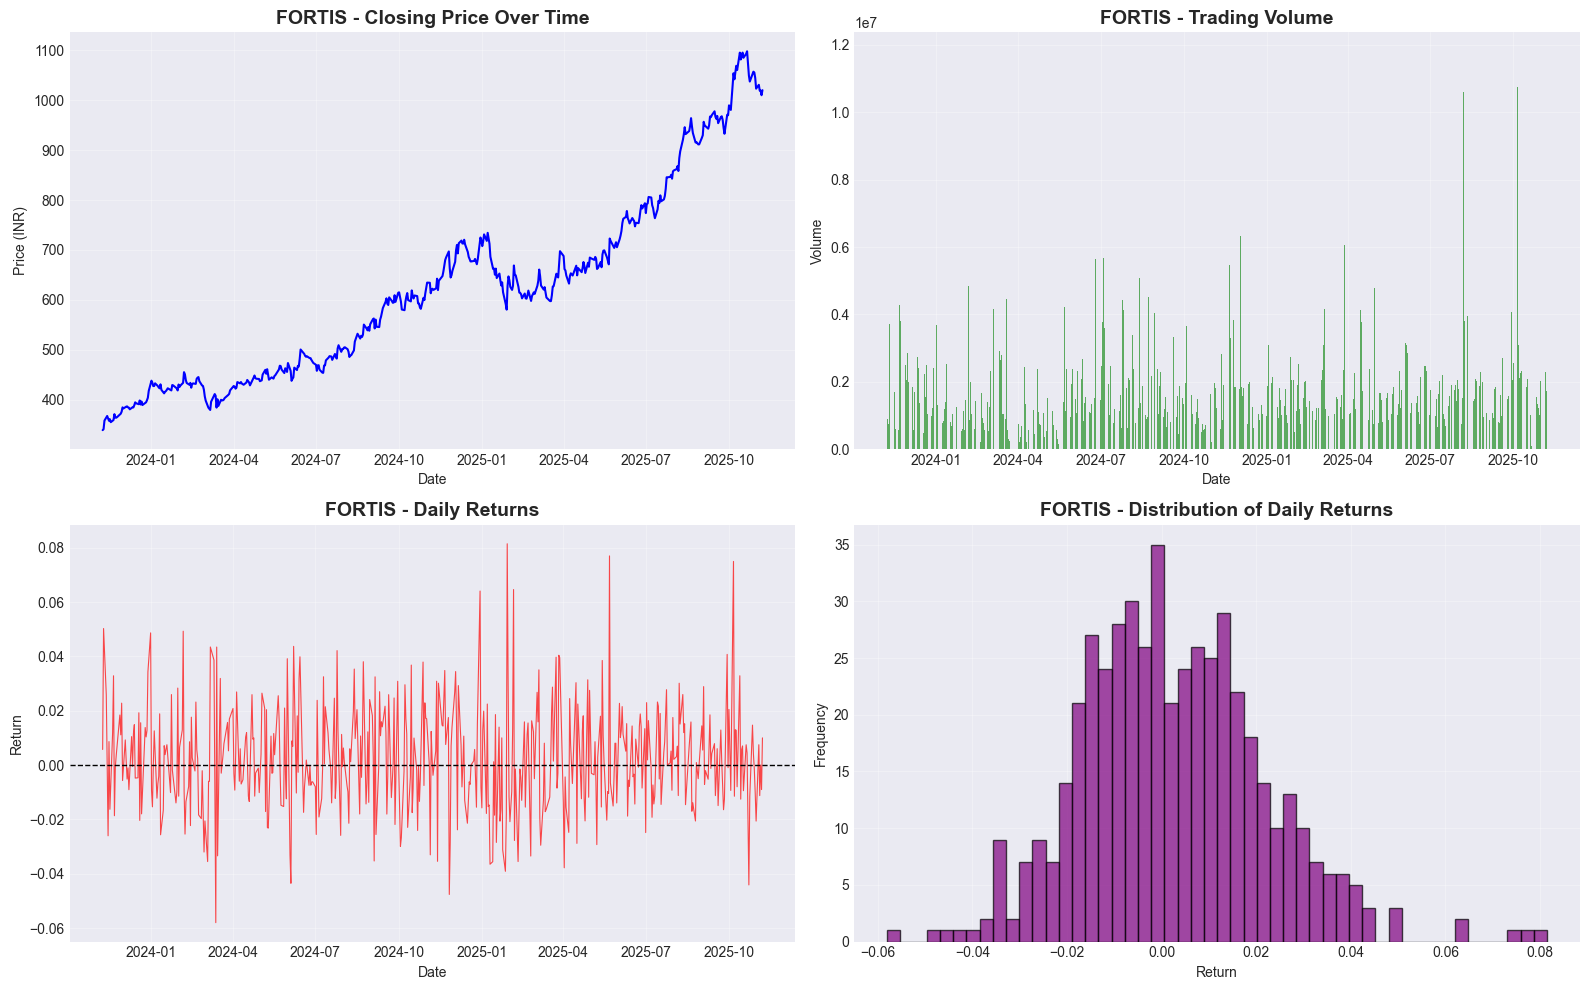

In [15]:
# Plot stock price over time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Closing price
axes[0, 0].plot(stock_data.index, stock_data['Close'], color='blue', linewidth=1.5)
axes[0, 0].set_title('FORTIS - Closing Price Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (INR)')
axes[0, 0].grid(True, alpha=0.3)

# Volume
axes[0, 1].bar(stock_data.index, stock_data['Volume'], color='green', alpha=0.6)
axes[0, 1].set_title('FORTIS - Trading Volume', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

# Daily returns
axes[1, 0].plot(returns.index, returns, color='red', linewidth=0.8, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].set_title('FORTIS - Daily Returns', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Return')
axes[1, 0].grid(True, alpha=0.3)

# Histogram of returns
axes[1, 1].hist(returns, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('FORTIS - Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Return')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

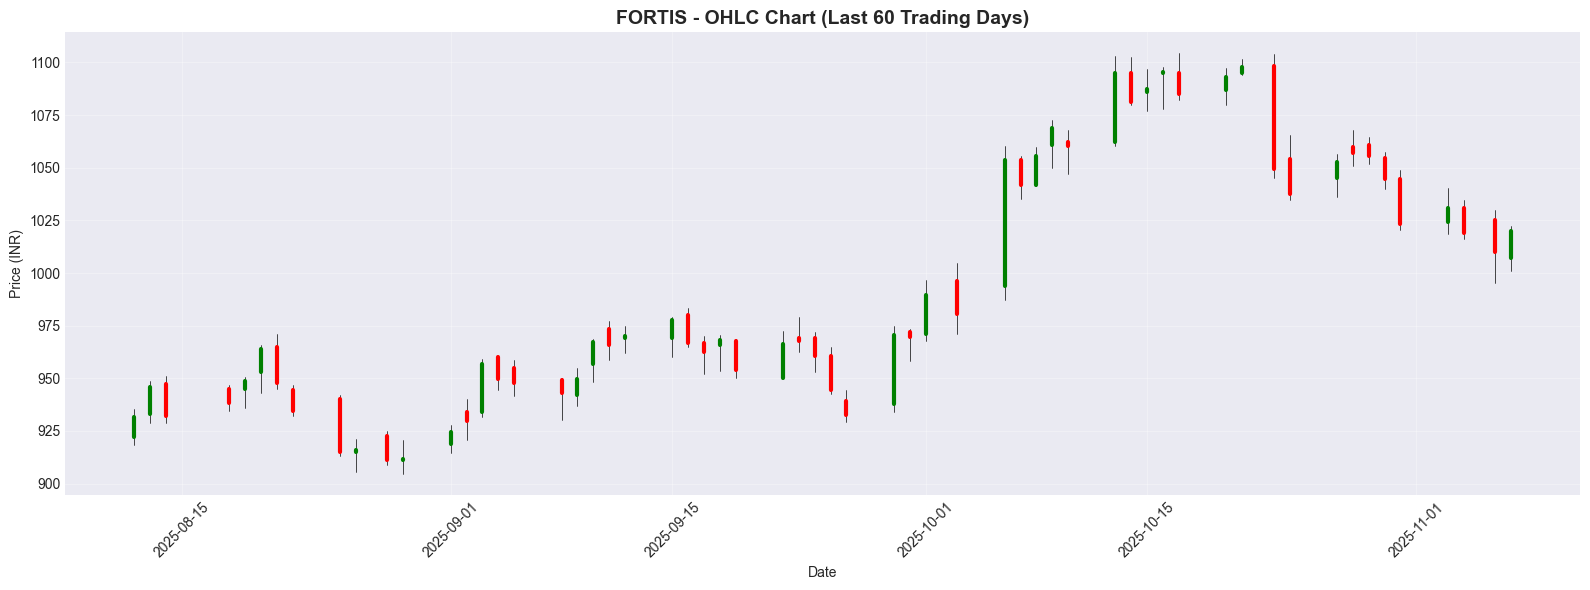

In [17]:
# Candlestick-style visualization (OHLC)
fig, ax = plt.subplots(figsize=(16, 6))

# Plot high and low as a line
for i in range(len(stock_data[-60:])):
    date = stock_data.index[-60:][i]
    high = stock_data['High'].iloc[-60:].iloc[i]
    low = stock_data['Low'].iloc[-60:].iloc[i]
    open_price = stock_data['Open'].iloc[-60:].iloc[i]
    close = stock_data['Close'].iloc[-60:].iloc[i]
    
    color = 'green' if close >= open_price else 'red'
    ax.plot([date, date], [low, high], color='black', linewidth=0.5)
    ax.plot([date, date], [open_price, close], color=color, linewidth=3)

ax.set_title('FORTIS - OHLC Chart (Last 60 Trading Days)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (INR)')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Statistical Analysis of Returns

In [18]:
# Calculate key statistics
mean_return = returns.mean()
median_return = returns.median()
std_return = returns.std()
variance = returns.var()
skewness = returns.skew()
kurtosis = returns.kurtosis()
min_return = returns.min()
max_return = returns.max()

print("Statistical Summary of Daily Returns:")
print("="*60)
print(f"Mean Daily Return:        {mean_return:.6f} ({mean_return*100:.4f}%)")
print(f"Median Daily Return:      {median_return:.6f} ({median_return*100:.4f}%)")
print(f"Standard Deviation:       {std_return:.6f} ({std_return*100:.4f}%)")
print(f"Variance:                 {variance:.6f}")
print(f"Skewness:                 {skewness:.6f}")
print(f"Kurtosis:                 {kurtosis:.6f}")
print(f"Minimum Return:           {min_return:.6f} ({min_return*100:.4f}%)")
print(f"Maximum Return:           {max_return:.6f} ({max_return*100:.4f}%)")
print("="*60)

# Annualized metrics (assuming 252 trading days)
annualized_return = mean_return * 252
annualized_volatility = std_return * np.sqrt(252)

print(f"\nAnnualized Metrics:")
print(f"Annualized Return:        {annualized_return:.6f} ({annualized_return*100:.4f}%)")
print(f"Annualized Volatility:    {annualized_volatility:.6f} ({annualized_volatility*100:.4f}%)")

Statistical Summary of Daily Returns:
Mean Daily Return:        0.002425 (0.2425%)
Median Daily Return:      0.000672 (0.0672%)
Standard Deviation:       0.019550 (1.9550%)
Variance:                 0.000382
Skewness:                 0.437802
Kurtosis:                 0.970639
Minimum Return:           -0.058026 (-5.8026%)
Maximum Return:           0.081469 (8.1469%)

Annualized Metrics:
Annualized Return:        0.611172 (61.1172%)
Annualized Volatility:    0.310345 (31.0345%)


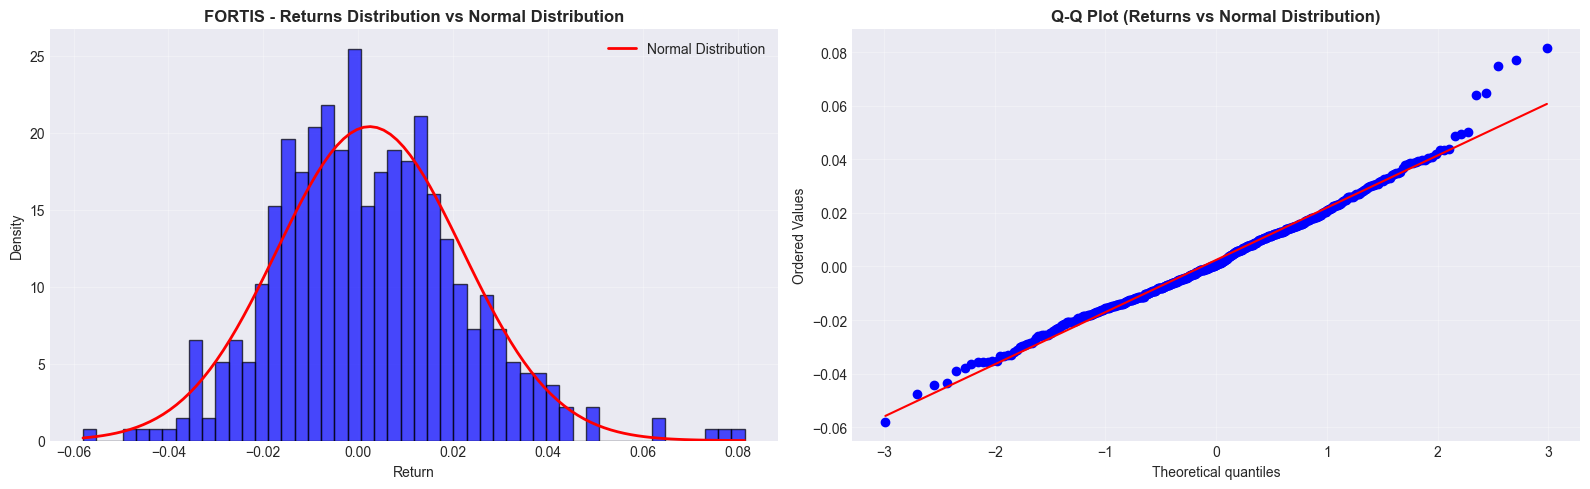

In [21]:
# Distribution analysis with normal distribution overlay
from scipy import stats

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram with normal distribution
axes[0].hist(returns, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
mu, sigma = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
axes[0].set_title('FORTIS - Returns Distribution vs Normal Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Return')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(returns, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Returns vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Risk Metrics Calculation

In [23]:
# Value at Risk (VaR) - Historical Method
confidence_levels = [0.90, 0.95, 0.99]

print("Value at Risk (VaR) - Historical Method:")
print("="*60)
for conf in confidence_levels:
    var = returns.quantile(1 - conf)
    print(f"VaR at {int(conf*100)}% confidence level: {var:.6f} ({var*100:.4f}%)")

print("\n" + "="*60)

# Value at Risk (VaR) - Parametric Method (Variance-Covariance)
print("\nValue at Risk (VaR) - Parametric Method:")
print("="*60)
for conf in confidence_levels:
    z_score = stats.norm.ppf(1 - conf)
    var_parametric = mean_return + z_score * std_return
    print(f"VaR at {int(conf*100)}% confidence level: {var_parametric:.6f} ({var_parametric*100:.4f}%)")

print("\n" + "="*60)

Value at Risk (VaR) - Historical Method:
VaR at 90% confidence level: -0.020361 (-2.0361%)
VaR at 95% confidence level: -0.027179 (-2.7179%)
VaR at 99% confidence level: -0.037931 (-3.7931%)


Value at Risk (VaR) - Parametric Method:
VaR at 90% confidence level: -0.022629 (-2.2629%)
VaR at 95% confidence level: -0.029731 (-2.9731%)
VaR at 99% confidence level: -0.043055 (-4.3055%)



In [24]:
# Conditional Value at Risk (CVaR) / Expected Shortfall
print("Conditional Value at Risk (CVaR) / Expected Shortfall:")
print("="*60)
for conf in confidence_levels:
    var = returns.quantile(1 - conf)
    cvar = returns[returns <= var].mean()
    print(f"CVaR at {int(conf*100)}% confidence level: {cvar:.6f} ({cvar*100:.4f}%)")

print("\n" + "="*60)

Conditional Value at Risk (CVaR) / Expected Shortfall:
CVaR at 90% confidence level: -0.029242 (-2.9242%)
CVaR at 95% confidence level: -0.035324 (-3.5324%)
CVaR at 99% confidence level: -0.046492 (-4.6492%)



In [25]:
# Sharpe Ratio (assuming risk-free rate of 6% annually)
risk_free_rate = 0.06
daily_rf_rate = risk_free_rate / 252

sharpe_ratio = (mean_return - daily_rf_rate) / std_return
annualized_sharpe = sharpe_ratio * np.sqrt(252)

print(f"Sharpe Ratio (Daily):        {sharpe_ratio:.6f}")
print(f"Sharpe Ratio (Annualized):   {annualized_sharpe:.6f}")

# Maximum Drawdown
cumulative_returns = (1 + returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

print(f"\nMaximum Drawdown:            {max_drawdown:.6f} ({max_drawdown*100:.4f}%)")

Sharpe Ratio (Daily):        0.111877
Sharpe Ratio (Annualized):   1.775998

Maximum Drawdown:            -0.209413 (-20.9413%)


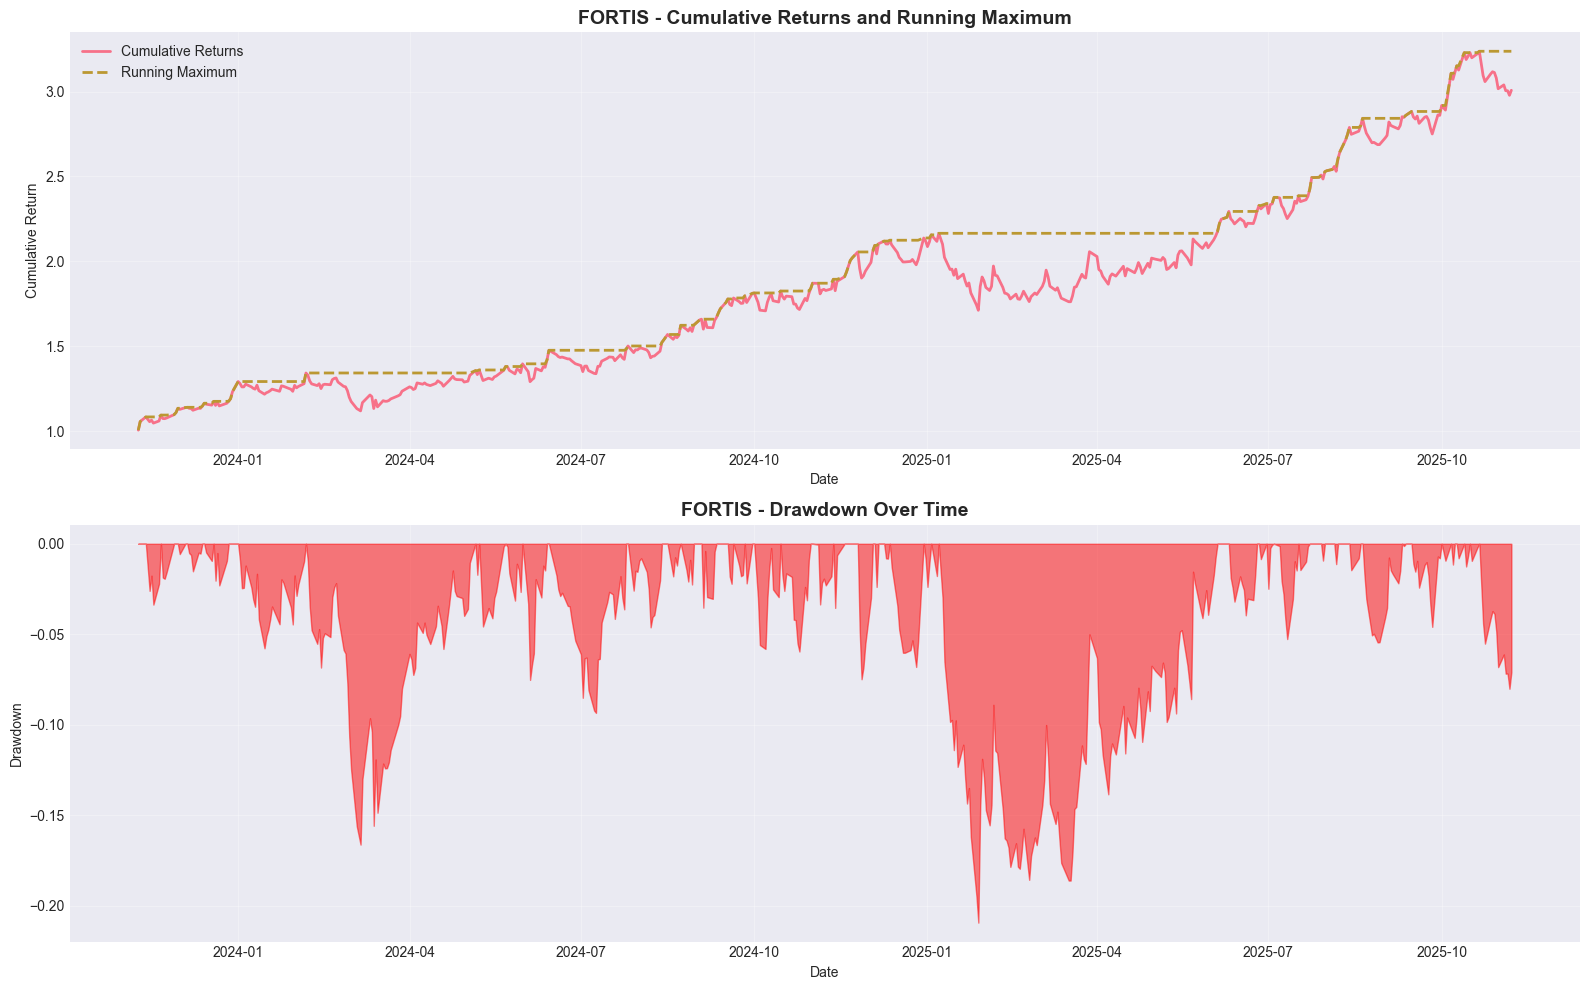

In [26]:
# Visualize drawdown
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Cumulative returns
axes[0].plot(cumulative_returns.index, cumulative_returns, label='Cumulative Returns', linewidth=2)
axes[0].plot(running_max.index, running_max, label='Running Maximum', linewidth=2, linestyle='--')
axes[0].set_title('FORTIS - Cumulative Returns and Running Maximum', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Return')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Drawdown
axes[1].fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.5)
axes[1].set_title('FORTIS - Drawdown Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Drawdown')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Moving Averages and Technical Indicators

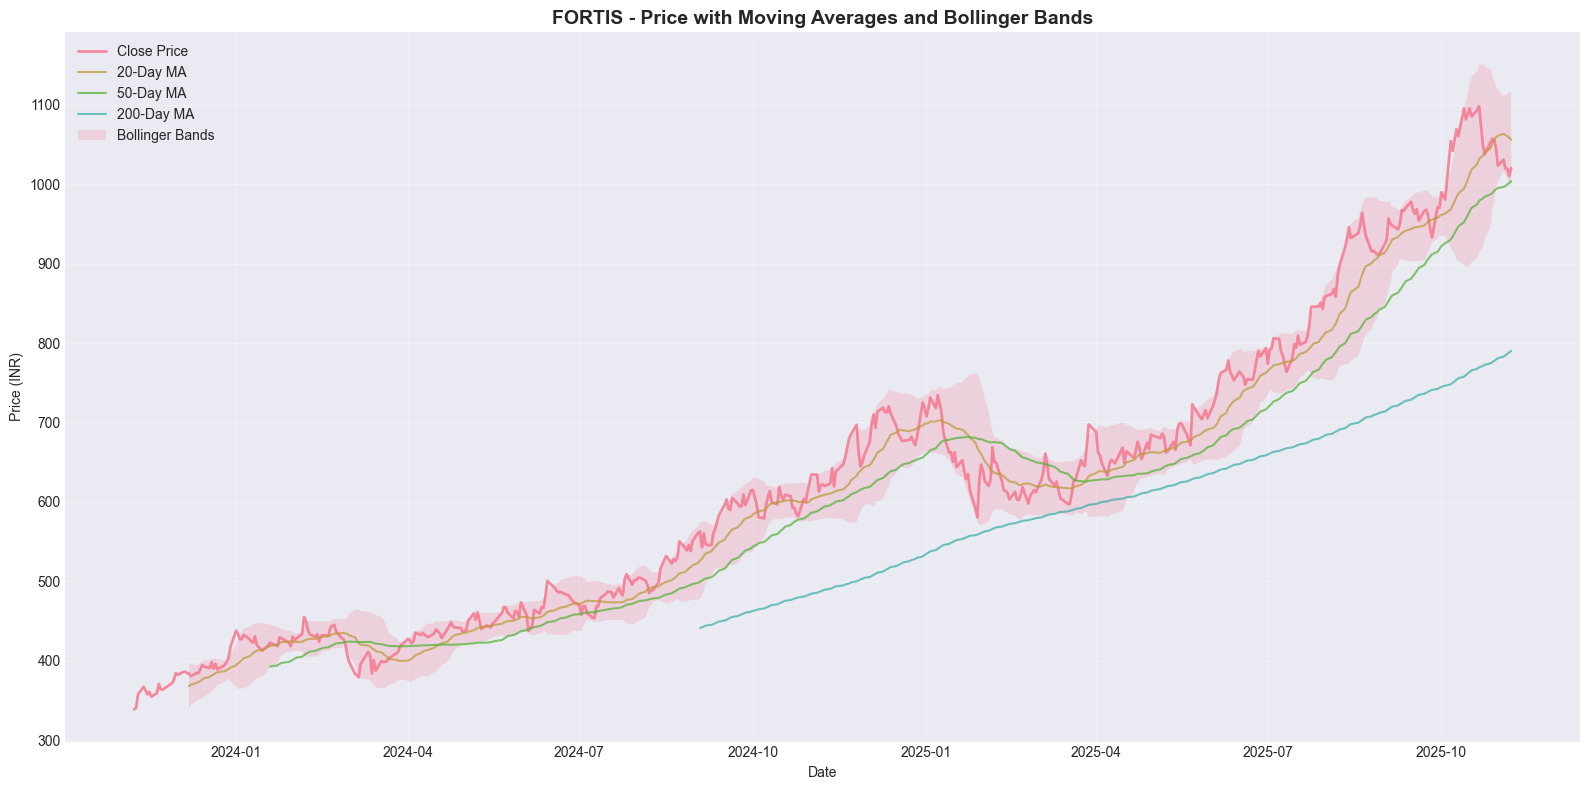

In [27]:
# Calculate moving averages
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Calculate Bollinger Bands
stock_data['BB_Upper'] = stock_data['MA_20'] + (stock_data['Close'].rolling(window=20).std() * 2)
stock_data['BB_Lower'] = stock_data['MA_20'] - (stock_data['Close'].rolling(window=20).std() * 2)

# Plot
plt.figure(figsize=(16, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', linewidth=2, alpha=0.8)
plt.plot(stock_data.index, stock_data['MA_20'], label='20-Day MA', linewidth=1.5, alpha=0.7)
plt.plot(stock_data.index, stock_data['MA_50'], label='50-Day MA', linewidth=1.5, alpha=0.7)
plt.plot(stock_data.index, stock_data['MA_200'], label='200-Day MA', linewidth=1.5, alpha=0.7)
plt.fill_between(stock_data.index, stock_data['BB_Upper'], stock_data['BB_Lower'], alpha=0.2, label='Bollinger Bands')

plt.title('FORTIS - Price with Moving Averages and Bollinger Bands', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

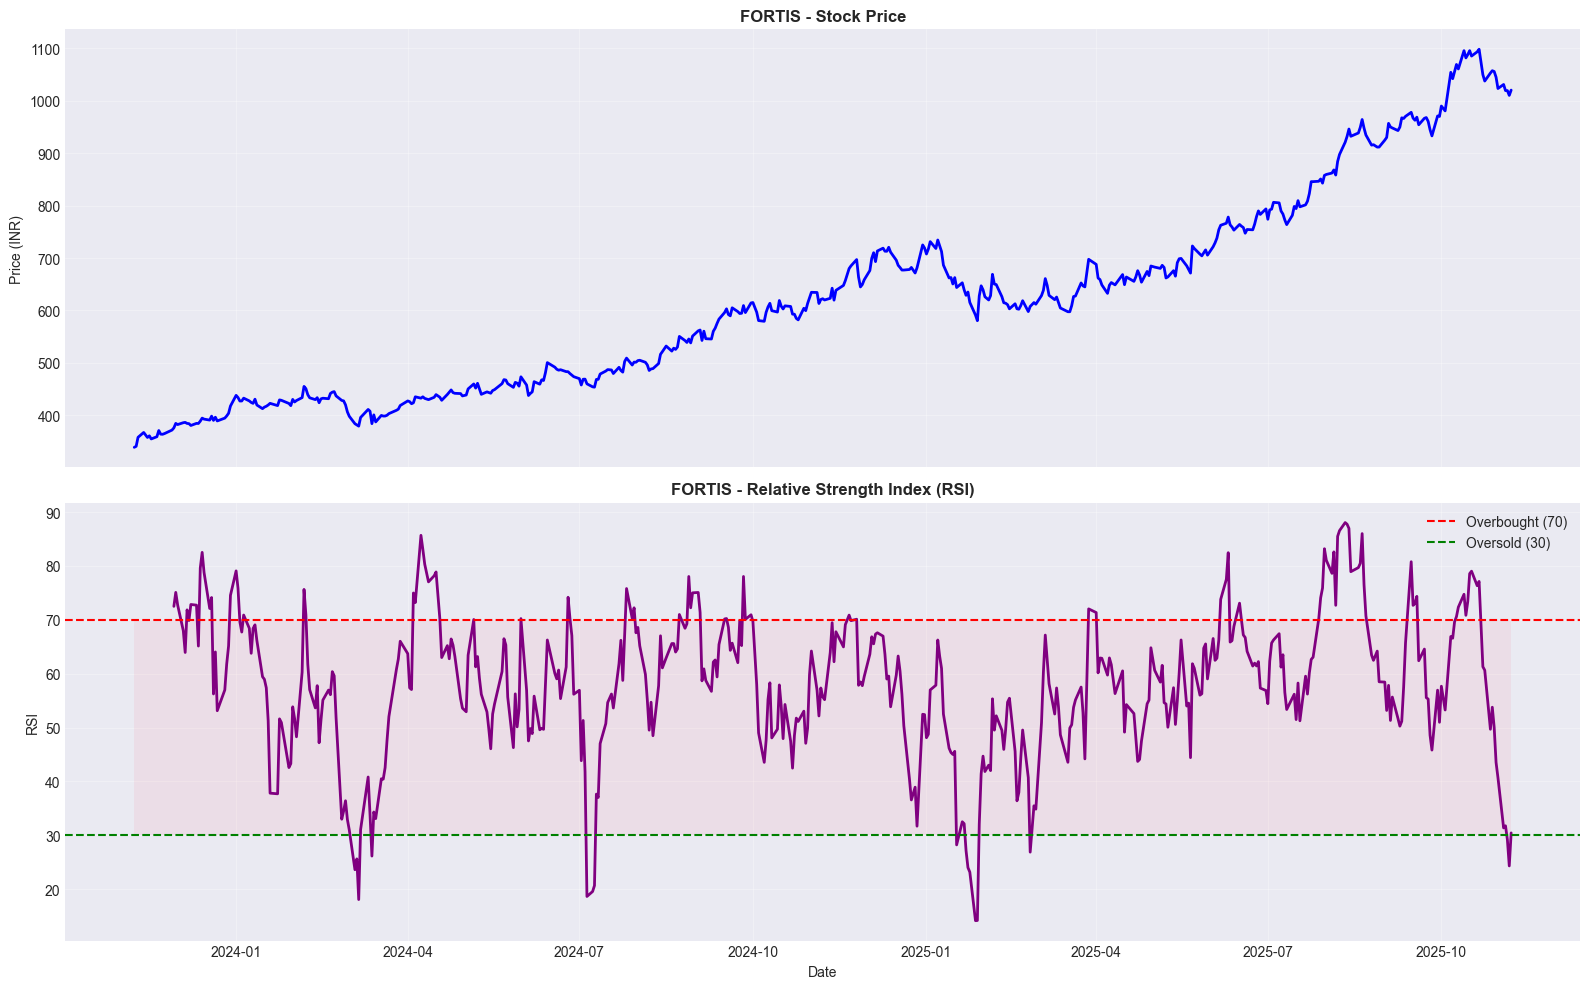

In [29]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data['Close'])

# Plot RSI
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Price
axes[0].plot(stock_data.index, stock_data['Close'], linewidth=2, color='blue')
axes[0].set_title('FORTIS - Stock Price', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price (INR)')
axes[0].grid(True, alpha=0.3)

# RSI
axes[1].plot(stock_data.index, stock_data['RSI'], linewidth=2, color='purple')
axes[1].axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
axes[1].fill_between(stock_data.index, 30, 70, alpha=0.1)
axes[1].set_title('FORTIS - Relative Strength Index (RSI)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Volatility Analysis

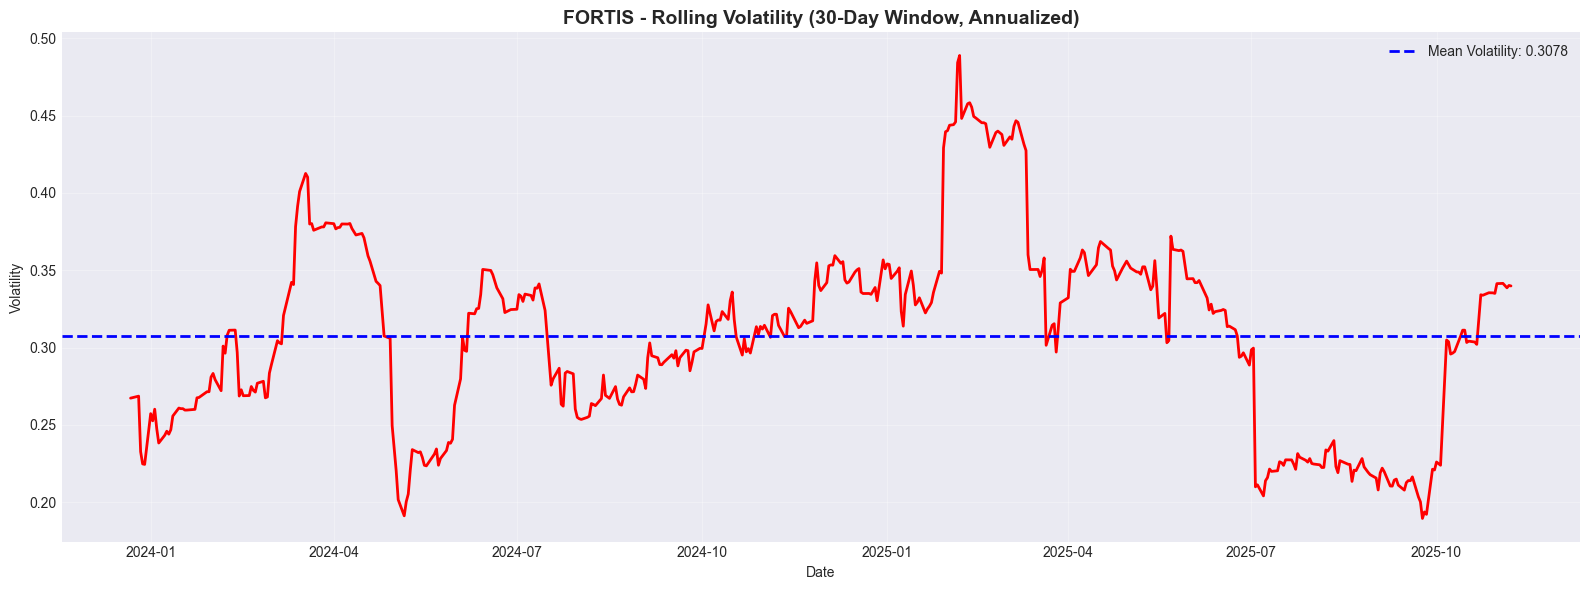

Average Rolling Volatility: 0.307772
Maximum Volatility: 0.488882
Minimum Volatility: 0.189559


In [31]:
# Rolling volatility (30-day window)
rolling_volatility = returns.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(16, 6))
plt.plot(rolling_volatility.index, rolling_volatility, linewidth=2, color='red')
plt.axhline(y=rolling_volatility.mean(), color='blue', linestyle='--', 
            label=f'Mean Volatility: {rolling_volatility.mean():.4f}', linewidth=2)
plt.title('FORTIS - Rolling Volatility (30-Day Window, Annualized)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Rolling Volatility: {rolling_volatility.mean():.6f}")
print(f"Maximum Volatility: {rolling_volatility.max():.6f}")
print(f"Minimum Volatility: {rolling_volatility.min():.6f}")

## 10. Correlation with Market Index (NIFTY 50)

In [32]:
# Download NIFTY 50 data for comparison
nifty_ticker = '^NSEI'
print(f"Downloading {nifty_ticker} data...")
nifty_data = yf.download(nifty_ticker, start=start_date, end=end_date, progress=False)

# Calculate NIFTY returns
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change()
nifty_returns = nifty_data['Daily_Return'].dropna()

# Align the data
combined_returns = pd.DataFrame({
    'FORTIS': returns,
    'NIFTY50': nifty_returns
}).dropna()

# Calculate correlation
correlation = combined_returns['FORTIS'].corr(combined_returns['NIFTY50'])
print(f"\nCorrelation between FORTIS and NIFTY 50: {correlation:.6f}")

# Calculate Beta
covariance = combined_returns['FORTIS'].cov(combined_returns['NIFTY50'])
market_variance = combined_returns['NIFTY50'].var()
beta = covariance / market_variance
print(f"Beta (FORTIS vs NIFTY 50): {beta:.6f}")


Correlation between FORTIS and NIFTY 50: 0.260655
Beta (FORTIS vs NIFTY 50): 0.615922


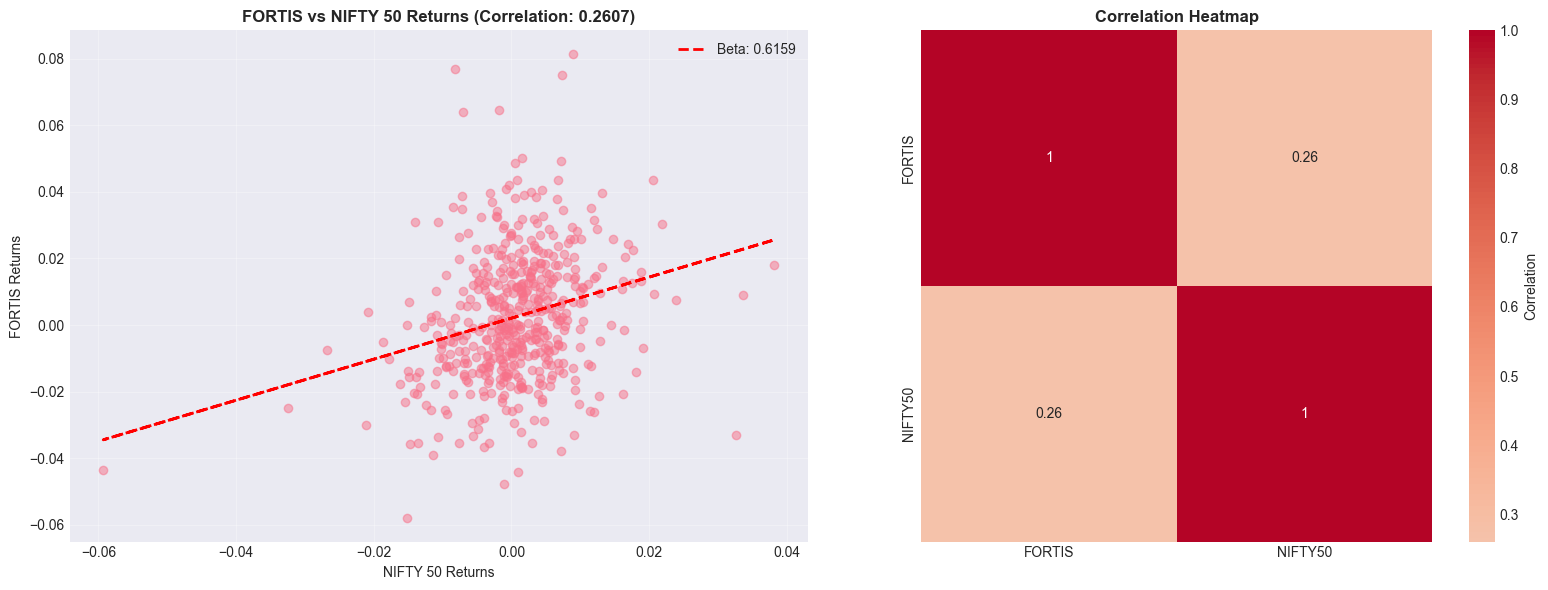

In [33]:
# Scatter plot of returns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(combined_returns['NIFTY50'], combined_returns['FORTIS'], alpha=0.5)
axes[0].set_xlabel('NIFTY 50 Returns')
axes[0].set_ylabel('FORTIS Returns')
axes[0].set_title(f'FORTIS vs NIFTY 50 Returns (Correlation: {correlation:.4f})', 
                  fontsize=12, fontweight='bold')

# Add regression line
z = np.polyfit(combined_returns['NIFTY50'], combined_returns['FORTIS'], 1)
p = np.poly1d(z)
axes[0].plot(combined_returns['NIFTY50'], p(combined_returns['NIFTY50']), 
             "r--", linewidth=2, label=f'Beta: {beta:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heatmap
correlation_matrix = combined_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Correlation Heatmap', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Performance Summary

In [34]:
# Create comprehensive summary
summary_data = {
    'Metric': [
        'Stock Symbol',
        'Start Date',
        'End Date',
        'Trading Days',
        'Start Price (INR)',
        'End Price (INR)',
        'Total Return (%)',
        'Mean Daily Return (%)',
        'Annualized Return (%)',
        'Daily Volatility (%)',
        'Annualized Volatility (%)',
        'Sharpe Ratio (Annualized)',
        'Maximum Drawdown (%)',
        'VaR 95% (%)',
        'CVaR 95% (%)',
        'Beta (vs NIFTY 50)',
        'Correlation with NIFTY 50',
        'Skewness',
        'Kurtosis'
    ],
    'Value': [
        ticker,
        stock_data.index[0].strftime('%Y-%m-%d'),
        stock_data.index[-1].strftime('%Y-%m-%d'),
        len(stock_data),
        f"{stock_data['Close'].iloc[0]:.2f}",
        f"{stock_data['Close'].iloc[-1]:.2f}",
        f"{((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0] - 1) * 100):.2f}",
        f"{mean_return * 100:.4f}",
        f"{annualized_return * 100:.2f}",
        f"{std_return * 100:.4f}",
        f"{annualized_volatility * 100:.2f}",
        f"{annualized_sharpe:.4f}",
        f"{max_drawdown * 100:.2f}",
        f"{returns.quantile(0.05) * 100:.4f}",
        f"{returns[returns <= returns.quantile(0.05)].mean() * 100:.4f}",
        f"{beta:.4f}",
        f"{correlation:.4f}",
        f"{skewness:.4f}",
        f"{kurtosis:.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("FORTIS HEALTHCARE - COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)


FORTIS HEALTHCARE - COMPREHENSIVE PERFORMANCE SUMMARY
                   Metric      Value
             Stock Symbol  FORTIS.NS
               Start Date 2023-11-08
                 End Date 2025-11-07
             Trading Days        494
        Start Price (INR)     339.15
          End Price (INR)    1020.00
         Total Return (%)     200.75
    Mean Daily Return (%)     0.2425
    Annualized Return (%)      61.12
     Daily Volatility (%)     1.9550
Annualized Volatility (%)      31.03
Sharpe Ratio (Annualized)     1.7760
     Maximum Drawdown (%)     -20.94
              VaR 95% (%)    -2.7179
             CVaR 95% (%)    -3.5324
       Beta (vs NIFTY 50)     0.6159
Correlation with NIFTY 50     0.2607
                 Skewness     0.4378
                 Kurtosis     0.9706


## 12. Conclusions and Insights

In [35]:
# Generate automated insights
print("KEY INSIGHTS:")
print("="*80)

# Return analysis
total_return = (stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0] - 1) * 100
if total_return > 0:
    print(f"✓ FORTIS has generated a positive return of {total_return:.2f}% over the period.")
else:
    print(f"✗ FORTIS has experienced a negative return of {total_return:.2f}% over the period.")

# Volatility analysis
if annualized_volatility > 0.40:
    print(f"⚠ High volatility detected ({annualized_volatility*100:.2f}%). Stock exhibits significant price fluctuations.")
elif annualized_volatility > 0.25:
    print(f"⚠ Moderate volatility ({annualized_volatility*100:.2f}%). Normal for healthcare sector stocks.")
else:
    print(f"✓ Low volatility ({annualized_volatility*100:.2f}%). Relatively stable stock.")

# Sharpe ratio analysis
if annualized_sharpe > 1:
    print(f"✓ Good risk-adjusted returns (Sharpe Ratio: {annualized_sharpe:.4f}).")
elif annualized_sharpe > 0:
    print(f"⚠ Moderate risk-adjusted returns (Sharpe Ratio: {annualized_sharpe:.4f}).")
else:
    print(f"✗ Poor risk-adjusted returns (Sharpe Ratio: {annualized_sharpe:.4f}).")

# Beta analysis
if beta > 1.2:
    print(f"⚠ High beta ({beta:.4f}). Stock is more volatile than the market.")
elif beta > 0.8:
    print(f"✓ Moderate beta ({beta:.4f}). Stock moves in line with the market.")
else:
    print(f"✓ Low beta ({beta:.4f}). Stock is less volatile than the market.")

# Distribution analysis
if abs(skewness) > 0.5:
    direction = "negative" if skewness < 0 else "positive"
    print(f"⚠ Returns distribution shows {direction} skewness ({skewness:.4f}).")
else:
    print(f"✓ Returns distribution is relatively symmetric (Skewness: {skewness:.4f}).")

if kurtosis > 3:
    print(f"⚠ Fat tails detected (Kurtosis: {kurtosis:.4f}). Higher probability of extreme events.")
else:
    print(f"✓ Normal tail behavior (Kurtosis: {kurtosis:.4f}).")

print("="*80)

KEY INSIGHTS:
✓ FORTIS has generated a positive return of 200.75% over the period.
⚠ Moderate volatility (31.03%). Normal for healthcare sector stocks.
✓ Good risk-adjusted returns (Sharpe Ratio: 1.7760).
✓ Low beta (0.6159). Stock is less volatile than the market.
✓ Returns distribution is relatively symmetric (Skewness: 0.4378).
✓ Normal tail behavior (Kurtosis: 0.9706).


## 13. Export Results

In [36]:
# Save summary to CSV
summary_df.to_csv('FORTIS_Performance_Summary.csv', index=False)
print("Performance summary saved to 'FORTIS_Performance_Summary.csv'")

# Save processed data
stock_data.to_csv('FORTIS_Processed_Data.csv')
print("Processed stock data saved to 'FORTIS_Processed_Data.csv'")

print("\n✓ All results exported successfully!")

Performance summary saved to 'FORTIS_Performance_Summary.csv'
Processed stock data saved to 'FORTIS_Processed_Data.csv'

✓ All results exported successfully!


---
## End of Analysis

This notebook provides a comprehensive analysis of FORTIS Healthcare stock including:
- Data collection and preprocessing
- Exploratory data analysis with visualizations
- Statistical analysis of returns
- Risk metrics (VaR, CVaR, Sharpe Ratio, Maximum Drawdown)
- Technical indicators (Moving Averages, RSI, Bollinger Bands)
- Volatility analysis
- Market correlation and Beta calculation
- Performance summary and insights

**Note:** Make sure to adjust the analysis period, risk-free rate, and other parameters according to your specific assignment requirements.

---
## 14. Forward Pricing Analysis

Calculate forward prices for different maturities and analyze the impact of dividend yield.

In [37]:
# Forward Price Calculation for FORTIS Healthcare
# Formula: F = S₀ * e^((r - q) * T)
# Where:
# F = Forward Price
# S₀ = Current Spot Price
# r = Risk-free rate
# q = Dividend yield
# T = Time to maturity (in years)

import math

# Inputs
spot_price = stock_data['Close'].iloc[-1]  # Current FORTIS price
risk_free_rate = 0.06  # 6% annual risk-free rate (Indian Government Bonds)

# Research FORTIS dividend yield (approximate based on healthcare sector)
# FORTIS Healthcare typically has a dividend yield around 0.5-1.0%
dividend_yield = 0.008  # 0.8% annual dividend yield (conservative estimate)

# Define different maturities (in years)
maturities = [
    (1/12, '1 Month'),
    (3/12, '3 Months'),
    (6/12, '6 Months'),
    (9/12, '9 Months'),
    (1, '1 Year'),
    (1.5, '1.5 Years'),
    (2, '2 Years'),
    (3, '3 Years')
]

print("="*80)
print("FORWARD PRICE CALCULATION - FORTIS HEALTHCARE")
print("="*80)
print(f"\nINPUT PARAMETERS:")
print(f"  Current Spot Price (S₀):        ₹{spot_price:.2f}")
print(f"  Risk-Free Rate (r):             {risk_free_rate*100:.2f}% per annum")
print(f"  Dividend Yield (q):             {dividend_yield*100:.2f}% per annum")
print(f"  Calculation Date:               {stock_data.index[-1].strftime('%Y-%m-%d')}")
print("\n" + "="*80)
print(f"FORMULA: F = S₀ × e^((r - q) × T)")
print(f"         F = {spot_price:.2f} × e^(({risk_free_rate:.4f} - {dividend_yield:.4f}) × T)")
print("="*80)

# Calculate forward prices for each maturity
forward_data = []

for time_years, maturity_label in maturities:
    # Calculate forward price
    forward_price = spot_price * math.exp((risk_free_rate - dividend_yield) * time_years)
    
    # Calculate absolute difference
    price_difference = forward_price - spot_price
    
    # Calculate percentage difference
    percent_difference = ((forward_price - spot_price) / spot_price) * 100
    
    # Store results
    forward_data.append({
        'Maturity': maturity_label,
        'Time (Years)': time_years,
        'Spot Price (₹)': spot_price,
        'Forward Price (₹)': forward_price,
        'Difference (₹)': price_difference,
        'Difference (%)': percent_difference
    })

# Create DataFrame
forward_df = pd.DataFrame(forward_data)

print("\n📊 FORWARD PRICES TABLE:")
print("="*80)
print(forward_df.to_string(index=False))
print("="*80)

FORWARD PRICE CALCULATION - FORTIS HEALTHCARE

INPUT PARAMETERS:
  Current Spot Price (S₀):        ₹1020.00
  Risk-Free Rate (r):             6.00% per annum
  Dividend Yield (q):             0.80% per annum
  Calculation Date:               2025-11-07

FORMULA: F = S₀ × e^((r - q) × T)
         F = 1020.00 × e^((0.0600 - 0.0080) × T)

📊 FORWARD PRICES TABLE:
 Maturity  Time (Years)  Spot Price (₹)  Forward Price (₹)  Difference (₹)  Difference (%)
  1 Month      0.083333          1020.0        1024.429591        4.429591        0.434274
 3 Months      0.250000          1020.0        1033.346565       13.346565        1.308487
 6 Months      0.500000          1020.0        1046.867767       26.867767        2.634095
 9 Months      0.750000          1020.0        1060.565893       40.565893        3.977048
   1 Year      1.000000          1020.0        1074.443257       54.443257        5.337574
1.5 Years      1.500000          1020.0        1102.745112       82.745112        8.112266
 

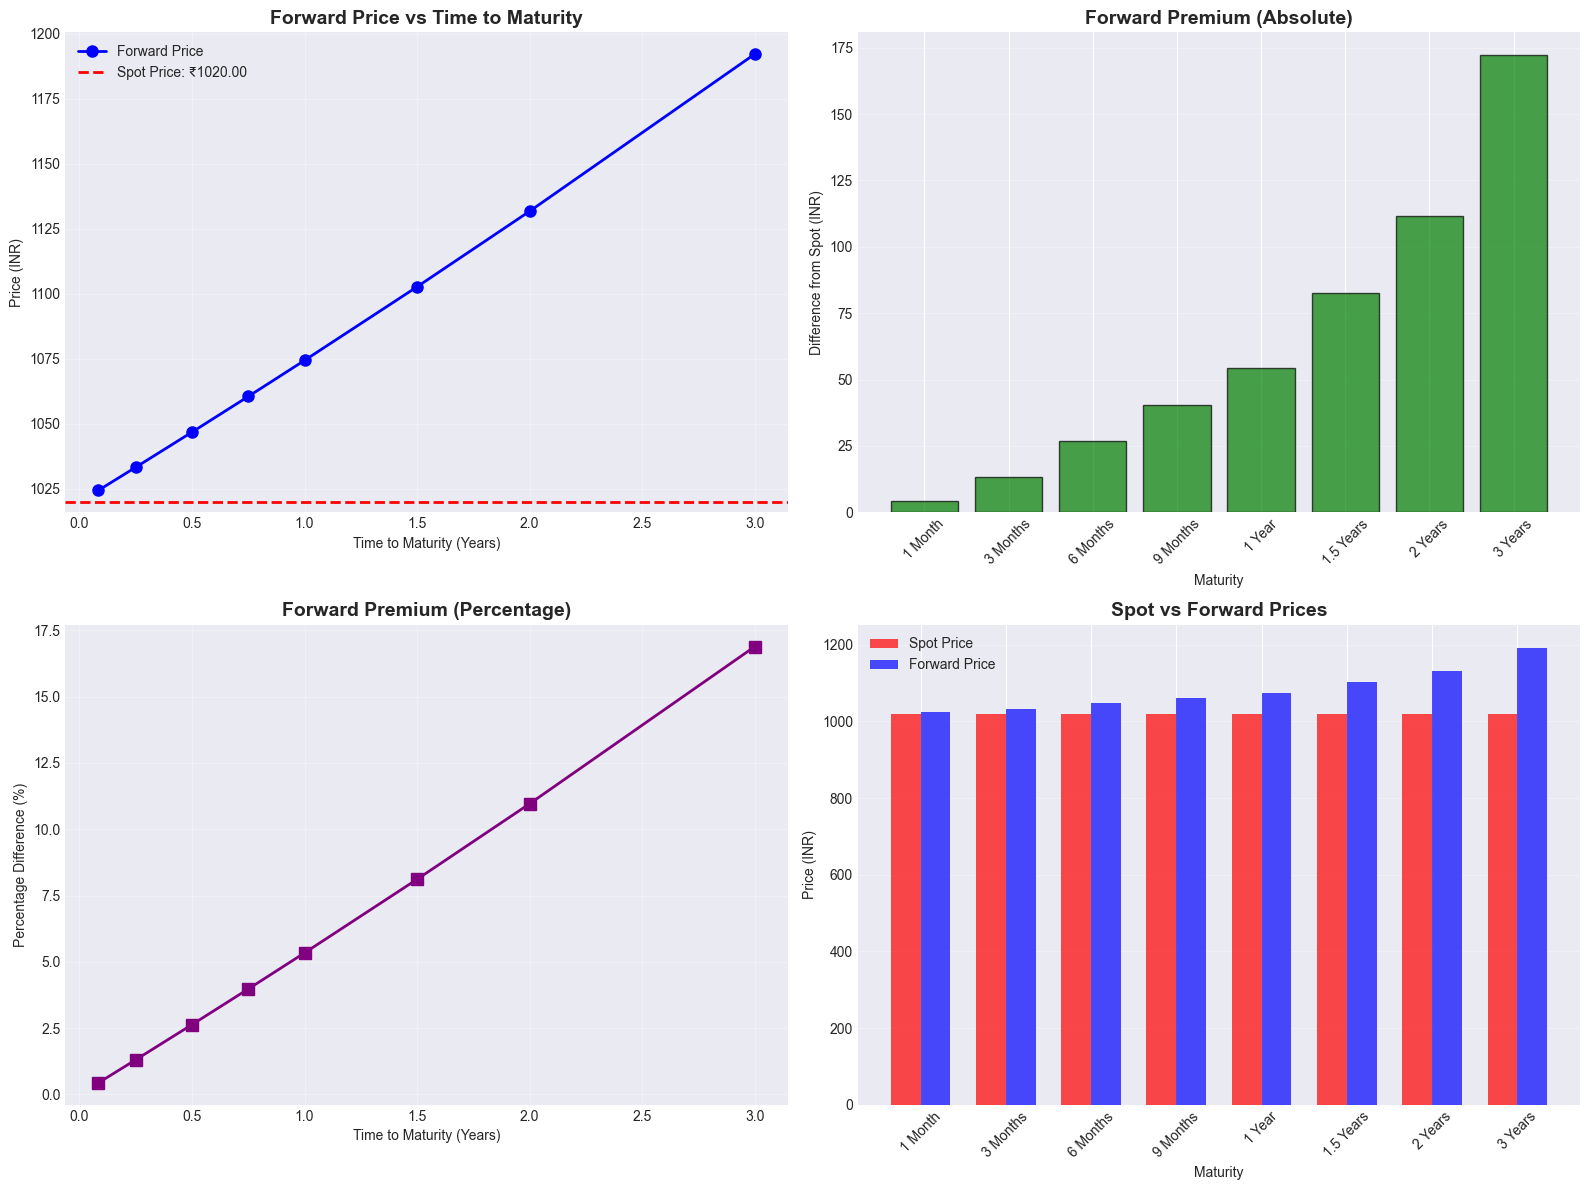

In [38]:
# Visualize Forward Prices vs Maturity
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Forward Price vs Maturity
axes[0, 0].plot(forward_df['Time (Years)'], forward_df['Forward Price (₹)'], 
                marker='o', linewidth=2, markersize=8, color='blue', label='Forward Price')
axes[0, 0].axhline(y=spot_price, color='red', linestyle='--', linewidth=2, label=f'Spot Price: ₹{spot_price:.2f}')
axes[0, 0].set_title('Forward Price vs Time to Maturity', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time to Maturity (Years)')
axes[0, 0].set_ylabel('Price (INR)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Price Difference (Absolute)
axes[0, 1].bar(forward_df['Maturity'], forward_df['Difference (₹)'], 
               color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Forward Premium (Absolute)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Maturity')
axes[0, 1].set_ylabel('Difference from Spot (INR)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Price Difference (Percentage)
axes[1, 0].plot(forward_df['Time (Years)'], forward_df['Difference (%)'], 
                marker='s', linewidth=2, markersize=8, color='purple')
axes[1, 0].set_title('Forward Premium (Percentage)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Time to Maturity (Years)')
axes[1, 0].set_ylabel('Percentage Difference (%)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Comparison of prices at different maturities
x_pos = np.arange(len(forward_df['Maturity']))
width = 0.35
axes[1, 1].bar(x_pos - width/2, [spot_price]*len(x_pos), width, 
               label='Spot Price', color='red', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, forward_df['Forward Price (₹)'], width, 
               label='Forward Price', color='blue', alpha=0.7)
axes[1, 1].set_title('Spot vs Forward Prices', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Maturity')
axes[1, 1].set_ylabel('Price (INR)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(forward_df['Maturity'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Analysis: Impact of Dividend Yield on Forward Prices

DIVIDEND YIELD IMPACT ANALYSIS (1-Year Maturity)
Spot Price: ₹1020.00
Risk-Free Rate: 6.00%
Time to Maturity: 1.0 year

                   Scenario  Dividend Yield (%)  Forward Price (₹)  Difference from Spot (₹)  Difference from Spot (%)
         No Dividend (q=0%)                 0.0        1083.073277                 63.073277                  6.183655
      Low Dividend (q=0.5%)                 0.5        1077.671427                 57.671427                  5.654061
  Current Estimate (q=0.8%)                 0.8        1074.443257                 54.443257                  5.337574
     High Dividend (q=1.5%)                 1.5        1066.948417                 46.948417                  4.602786
Very High Dividend (q=2.0%)                 2.0        1061.626990                 41.626990                  4.081077


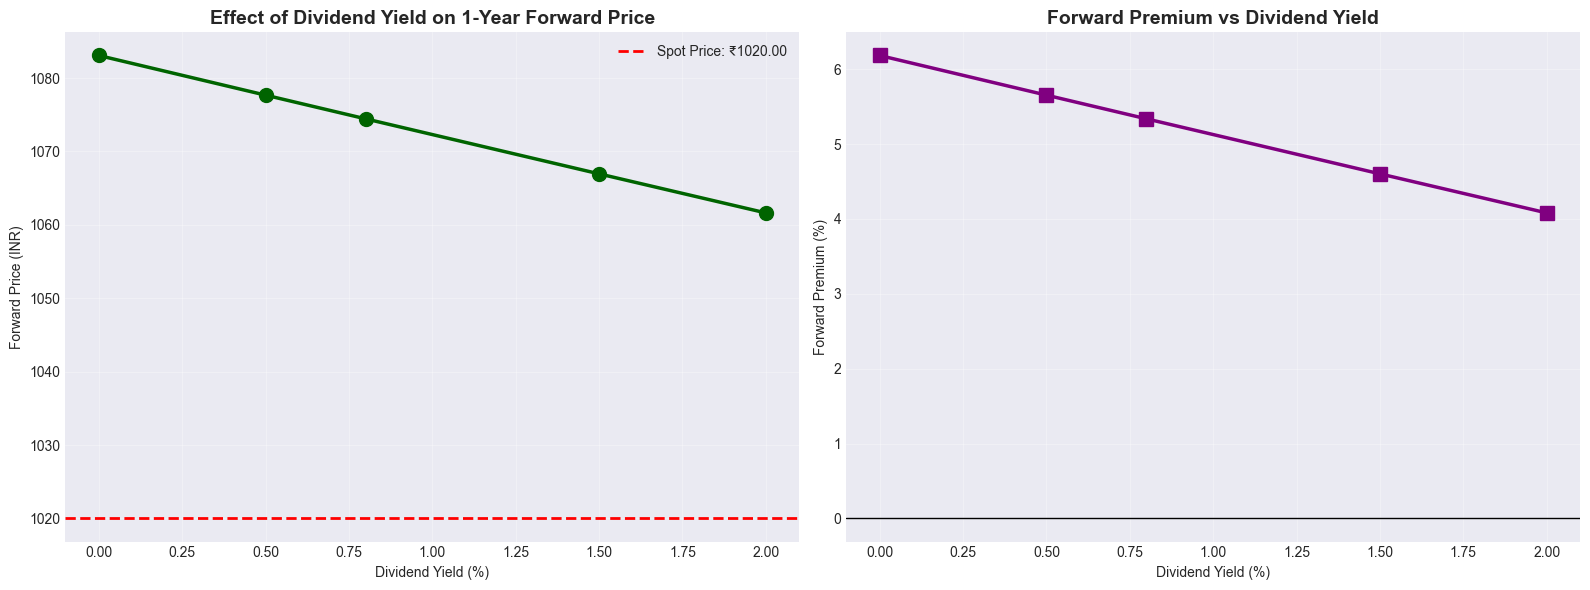

In [39]:
# Compare forward prices with different dividend yield scenarios
dividend_scenarios = [
    (0.00, 'No Dividend (q=0%)'),
    (0.005, 'Low Dividend (q=0.5%)'),
    (0.008, 'Current Estimate (q=0.8%)'),
    (0.015, 'High Dividend (q=1.5%)'),
    (0.020, 'Very High Dividend (q=2.0%)')
]

# Use 1-year maturity for comparison
maturity_1year = 1.0

print("="*80)
print("DIVIDEND YIELD IMPACT ANALYSIS (1-Year Maturity)")
print("="*80)
print(f"Spot Price: ₹{spot_price:.2f}")
print(f"Risk-Free Rate: {risk_free_rate*100:.2f}%")
print(f"Time to Maturity: {maturity_1year} year")
print("\n" + "="*80)

dividend_impact_data = []

for div_yield, scenario_name in dividend_scenarios:
    forward_price_scenario = spot_price * math.exp((risk_free_rate - div_yield) * maturity_1year)
    difference = forward_price_scenario - spot_price
    percent_diff = ((forward_price_scenario - spot_price) / spot_price) * 100
    
    dividend_impact_data.append({
        'Scenario': scenario_name,
        'Dividend Yield (%)': div_yield * 100,
        'Forward Price (₹)': forward_price_scenario,
        'Difference from Spot (₹)': difference,
        'Difference from Spot (%)': percent_diff
    })

dividend_impact_df = pd.DataFrame(dividend_impact_data)
print(dividend_impact_df.to_string(index=False))
print("="*80)

# Visualize dividend yield impact
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Forward Price vs Dividend Yield
axes[0].plot(dividend_impact_df['Dividend Yield (%)'], 
             dividend_impact_df['Forward Price (₹)'], 
             marker='o', linewidth=2.5, markersize=10, color='darkgreen')
axes[0].axhline(y=spot_price, color='red', linestyle='--', linewidth=2, 
                label=f'Spot Price: ₹{spot_price:.2f}')
axes[0].set_title('Effect of Dividend Yield on 1-Year Forward Price', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dividend Yield (%)')
axes[0].set_ylabel('Forward Price (INR)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Percentage Difference vs Dividend Yield
axes[1].plot(dividend_impact_df['Dividend Yield (%)'], 
             dividend_impact_df['Difference from Spot (%)'], 
             marker='s', linewidth=2.5, markersize=10, color='purple')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Forward Premium vs Dividend Yield', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dividend Yield (%)')
axes[1].set_ylabel('Forward Premium (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Key Findings and Interpretation

In [40]:
# Generate comprehensive interpretation
print("="*80)
print("INTERPRETATION AND DISCUSSION")
print("="*80)

print("\n1. HOW FORWARD PRICE CHANGES WITH MATURITY:")
print("-" * 80)

# Calculate growth rates
short_term_growth = forward_df[forward_df['Maturity'] == '3 Months']['Difference (%)'].values[0]
medium_term_growth = forward_df[forward_df['Maturity'] == '1 Year']['Difference (%)'].values[0]
long_term_growth = forward_df[forward_df['Maturity'] == '3 Years']['Difference (%)'].values[0]

print(f"   • Short-term (3 months):  Forward price is ₹{forward_df[forward_df['Maturity'] == '3 Months']['Forward Price (₹)'].values[0]:.2f}")
print(f"                             Premium: +{short_term_growth:.2f}% above spot")
print(f"   • Medium-term (1 year):   Forward price is ₹{forward_df[forward_df['Maturity'] == '1 Year']['Forward Price (₹)'].values[0]:.2f}")
print(f"                             Premium: +{medium_term_growth:.2f}% above spot")
print(f"   • Long-term (3 years):    Forward price is ₹{forward_df[forward_df['Maturity'] == '3 Years']['Forward Price (₹)'].values[0]:.2f}")
print(f"                             Premium: +{long_term_growth:.2f}% above spot")

print("\n   OBSERVATION:")
print(f"   → Forward prices INCREASE as maturity lengthens")
print(f"   → The relationship is EXPONENTIAL, not linear")
print(f"   → Longer maturities accumulate more carrying cost")
print(f"   → 3-year forward is {long_term_growth:.2f}% higher than spot price")

print("\n2. EFFECT OF DIVIDEND YIELD:")
print("-" * 80)

no_div_forward = spot_price * math.exp(risk_free_rate * maturity_1year)
with_div_forward = spot_price * math.exp((risk_free_rate - dividend_yield) * maturity_1year)
dividend_effect = no_div_forward - with_div_forward

print(f"   • 1-Year Forward WITHOUT dividends (q=0%):    ₹{no_div_forward:.2f}")
print(f"   • 1-Year Forward WITH dividends (q=0.8%):     ₹{with_div_forward:.2f}")
print(f"   • Difference caused by dividends:             ₹{dividend_effect:.2f} ({(dividend_effect/spot_price)*100:.2f}%)")

print("\n   OBSERVATION:")
print(f"   → Dividend yield REDUCES forward prices")
print(f"   → Higher dividend yield = Lower forward price")
print(f"   → For every 1% increase in dividend yield, 1-year forward drops by ~₹{spot_price * (math.exp(-0.01 * maturity_1year) - 1):.2f}")
print(f"   → This is because dividends represent cash outflow during the holding period")
print(f"   → Forward contract holders don't receive dividends, so forward price adjusts downward")

print("\n3. THEORETICAL EXPLANATION:")
print("-" * 80)
print("   The forward price formula F = S₀ × e^((r-q)×T) shows:")
print("   ")
print(f"   • RISK-FREE RATE (r={risk_free_rate*100:.1f}%): Increases forward price")
print("     - Represents the cost of carry (financing cost)")
print("     - Higher rates → Higher forward prices")
print("   ")
print(f"   • DIVIDEND YIELD (q={dividend_yield*100:.1f}%): Decreases forward price")
print("     - Represents benefit of holding spot position")
print("     - Higher dividends → Lower forward prices")
print("   ")
print(f"   • NET CARRY COST (r-q={((risk_free_rate-dividend_yield)*100):.1f}%): {risk_free_rate-dividend_yield:.4f}")
print("     - Since r > q, forward prices are in CONTANGO")
print("     - Forward prices trade at premium to spot")

print("\n4. PRACTICAL IMPLICATIONS:")
print("-" * 80)
print("   ✓ Investors can lock in future FORTIS prices using forwards")
print(f"   ✓ Current 1-year forward rate: ₹{with_div_forward:.2f}")
print(f"   ✓ If expecting price > ₹{with_div_forward:.2f}, take long forward position")
print(f"   ✓ If expecting price < ₹{with_div_forward:.2f}, take short forward position")
print(f"   ✓ Dividend payments reduce forward attractiveness for long positions")

print("\n" + "="*80)
print("✓ FORWARD PRICING ANALYSIS COMPLETE")
print("="*80)

INTERPRETATION AND DISCUSSION

1. HOW FORWARD PRICE CHANGES WITH MATURITY:
--------------------------------------------------------------------------------
   • Short-term (3 months):  Forward price is ₹1033.35
                             Premium: +1.31% above spot
   • Medium-term (1 year):   Forward price is ₹1074.44
                             Premium: +5.34% above spot
   • Long-term (3 years):    Forward price is ₹1192.20
                             Premium: +16.88% above spot

   OBSERVATION:
   → Forward prices INCREASE as maturity lengthens
   → The relationship is EXPONENTIAL, not linear
   → Longer maturities accumulate more carrying cost
   → 3-year forward is 16.88% higher than spot price

2. EFFECT OF DIVIDEND YIELD:
--------------------------------------------------------------------------------
   • 1-Year Forward WITHOUT dividends (q=0%):    ₹1083.07
   • 1-Year Forward WITH dividends (q=0.8%):     ₹1074.44
   • Difference caused by dividends:             ₹8.63 (0.85

In [41]:
# Export forward pricing results to CSV
forward_df.to_csv('FORTIS_Forward_Prices.csv', index=False)
dividend_impact_df.to_csv('FORTIS_Dividend_Impact.csv', index=False)

print("✓ Forward pricing tables exported:")
print("  • FORTIS_Forward_Prices.csv")
print("  • FORTIS_Dividend_Impact.csv")

✓ Forward pricing tables exported:
  • FORTIS_Forward_Prices.csv
  • FORTIS_Dividend_Impact.csv
